<a href="https://colab.research.google.com/github/K0K0N00B/Numeros_d-gitos_de_siete_segmentos/blob/main/Ultron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importa imagenes de mi repositorio**

In [2]:
! git clone https://github.com/K0K0N00B/Numeros_d-gitos_de_siete_segmentos.git

Cloning into 'Numeros_d-gitos_de_siete_segmentos'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 246 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (246/246), 598.73 KiB | 2.56 MiB/s, done.
Resolving deltas: 100% (12/12), done.


Carpetas detectadas: ['0', '5', '6', '4', '3', '9', '7', '8', '2', '1']
Carpetas después de limpieza: ['0', '5', '6', '4', '3', '9', '7', '8', '2', '1']
Found 178 images belonging to 10 classes.
Found 39 images belonging to 10 classes.
Construyendo un nuevo modelo.
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2325 - loss: 2.5627 - val_accuracy: 0.2564 - val_loss: 2.1874
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.2330 - loss: 2.1589 - val_accuracy: 0.4103 - val_loss: 1.7697
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3666 - loss: 1.8503 - val_accuracy: 0.6667 - val_loss: 1.8247
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4387 - loss: 1.8990 - val_accuracy: 0.4103 - val_loss: 1.6362
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3770 - loss: 1.7895 - val_accuracy: 0.5897 - val_loss: 1.4887
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5317 - loss: 1.5561 - val_accuracy: 0.6410 - val_loss: 1.

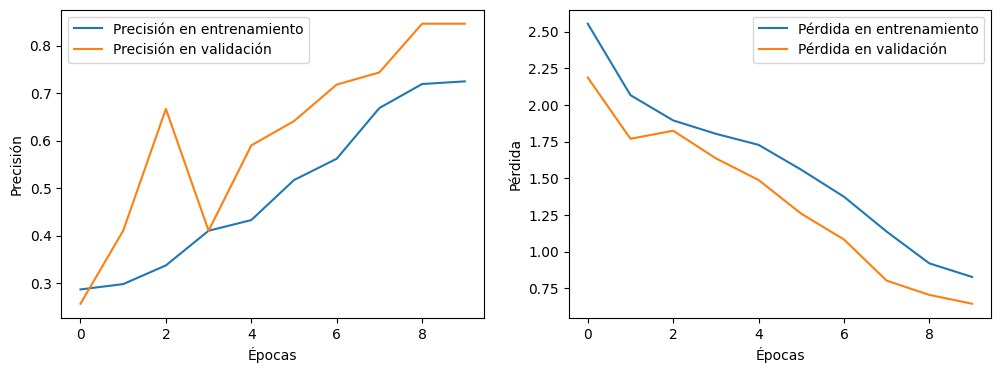

In [20]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import shutil

# Ruta a la carpeta que contiene las subcarpetas con las imágenes
ruta_base = '/content/Numeros_d-gitos_de_siete_segmentos/'

# Listar las carpetas en la ruta_base
carpetas = os.listdir(ruta_base)
print("Carpetas detectadas:", carpetas)

# Eliminar carpetas que no correspondan a dígitos (opcional)
carpetas_indeseadas = ['.ipynb_checkpoints', '.git']  # Añade cualquier otra carpeta no deseada aquí
for carpeta in carpetas_indeseadas:
    carpeta_path = os.path.join(ruta_base, carpeta)
    if os.path.exists(carpeta_path):
        shutil.rmtree(carpeta_path)

# Confirmar que solo hay 10 clases (0 al 9)
carpetas = os.listdir(ruta_base)
print("Carpetas después de limpieza:", carpetas)

# Dimensiones de las imágenes (ajústalas si es necesario)
img_height = 128
img_width = 128
batch_size = 32

# Crear un generador de datos para cargar las imágenes y etiquetarlas según el nombre de la carpeta
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Aseguramos que las imágenes tengan 3 canales (RGB)
train_data = datagen.flow_from_directory(
    ruta_base,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Usar las imágenes para entrenamiento
    color_mode='rgb'  # Cambiamos a 'rgb' en lugar de 'grayscale'
)

val_data = datagen.flow_from_directory(
    ruta_base,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Usar las imágenes para validación
    color_mode='rgb'  # Cambiamos a 'rgb'
)

# Reconstruir el modelo (evitamos cargar el modelo antiguo)
print("Construyendo un nuevo modelo.")

# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 clases (dígitos 0-9)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Ajusta el número de épocas según tu preferencia
)

# Guardar el modelo entrenado
model.save('/content/ultron.h5')

# Mostrar una gráfica del progreso (precisión y pérdida)
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,932 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Saving Captura de pantalla 2024-09-01 210919.png to Captura de pantalla 2024-09-01 210919 (3).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
La red neuronal predice que es un '1' con 99.94% de seguridad.


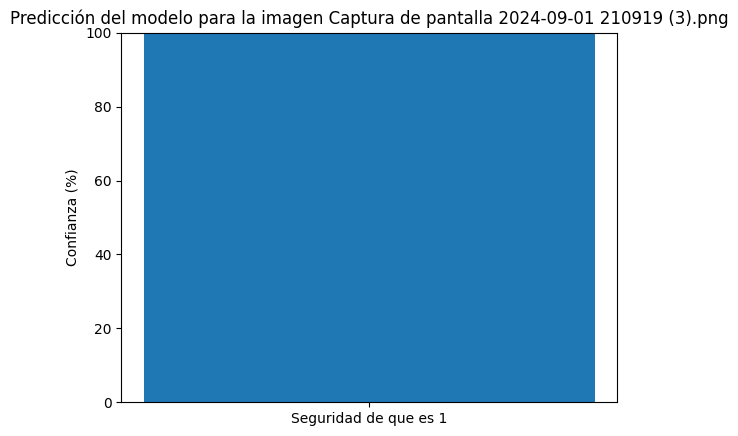

¿La predicción fue correcta? (s/n): s
¡Perfecto! La predicción fue correcta.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from google.colab import files
from PIL import Image

# Cargar el modelo
model = load_model('ultron.h5')

# Verificar el tamaño de entrada esperado por el modelo
model.summary()

# Función para cargar la imagen desde la PC
def cargar_imagen():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        img = Image.open(img_name)

        # Ajustar el tamaño de la imagen según lo que espera el modelo (revisar en model.summary())
        img = img.resize((128, 128))  # Ajusta según el tamaño de entrada del modelo, ejemplo: 128x128

        img = img.convert('RGB')  # Convertir a RGB (3 canales)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Expander a 4 dimensiones (1, 128, 128, 3)
        img_array = img_array / 255.0  # Normalizar los valores de la imagen entre 0 y 1
        return img_array, img_name

# Función para predecir la clase de la imagen
def predecir_imagen(img_array):
    prediction = model.predict(img_array)

    # Obtener la clase con mayor probabilidad
    pred_label = np.argmax(prediction, axis=1)[0]

    # Obtener el porcentaje de confianza en la predicción
    confidence = np.max(prediction) * 100
    return pred_label, confidence

# Cargar imagen desde la PC
img_array, img_name = cargar_imagen()

# Predecir la imagen cargada
pred_label, confidence = predecir_imagen(img_array)

# Mostrar el resultado de la predicción
if pred_label == 1:
    print(f"La red neuronal predice que es un '1' con {confidence:.2f}% de seguridad.")
else:
    print(f"La red neuronal no predice que sea un '1'. Está {confidence:.2f}% segura de que es un '1'.")

# Graficar el progreso de la predicción
plt.bar(['Seguridad de que es 1'], [confidence])
plt.ylim([0, 100])
plt.ylabel('Confianza (%)')
plt.title(f"Predicción del modelo para la imagen {img_name}")
plt.show()

# Preguntar si la predicción fue correcta
respuesta = input("¿La predicción fue correcta? (s/n): ")

if respuesta.lower() == 's':
    print("¡Perfecto! La predicción fue correcta.")
elif respuesta.lower() == 'n':
    print("Lo siento, la predicción fue incorrecta.")
else:
    print("Respuesta no válida. Por favor responde con 's' o 'n'.")


In [22]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Cargar el modelo existente
model = load_model('ultron.h5')

# Ruta a la carpeta que contiene las subcarpetas con imágenes de los dígitos 0 al 9
ruta_base = '/content/Numeros_d-gitos_de_siete_segmentos/'

# Función para obtener una imagen aleatoria de las carpetas (0 al 9)
def obtener_imagen_aleatoria():
    carpetas = [str(i) for i in range(10)]  # Carpetas '0', '1', ..., '9'
    carpeta_seleccionada = random.choice(carpetas)  # Seleccionar carpeta aleatoriamente
    carpeta_path = os.path.join(ruta_base, carpeta_seleccionada)

    # Obtener una imagen aleatoria de la carpeta seleccionada
    imagenes = os.listdir(carpeta_path)
    imagen_seleccionada = random.choice(imagenes)
    img_path = os.path.join(carpeta_path, imagen_seleccionada)

    # Cargar y procesar la imagen
    img = Image.open(img_path)
    img = img.resize((128, 128))  # Cambiar tamaño a lo que espera el modelo
    img = img.convert('RGB')  # Asegurar que esté en formato RGB
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizar

    return img_array, carpeta_seleccionada, img_path

# Función para predecir la clase de una imagen
def predecir_imagen(img_array):
    prediccion = model.predict(img_array)
    pred_label = np.argmax(prediccion, axis=1)[0]
    return pred_label

# Función para realizar las predicciones en imágenes aleatorias
def ciclo_prediccion():
    aciertos = False
    while not aciertos:
        errores = []
        for i in range(10):
            # Obtener imagen aleatoria
            img_array, etiqueta_real, img_path = obtener_imagen_aleatoria()

            # Hacer predicción
            pred_label = predecir_imagen(img_array)

            # Verificar si la predicción es correcta
            if str(pred_label) != etiqueta_real:
                errores.append((img_path, etiqueta_real, pred_label))

        # Si no hay errores, se detiene el ciclo
        if len(errores) == 0:
            aciertos = True
        else:
            print(f"Errores encontrados en {len(errores)} imágenes. Repitiendo...")
            for error in errores:
                img_path, etiqueta_real, pred_label = error
                print(f"Error en imagen: {img_path}. Etiqueta real: {etiqueta_real}, Predicción: {pred_label}")

# Ejecutar ciclo de predicción hasta que todo esté correcto
ciclo_prediccion()

# Guardar el modelo una vez que todas las predicciones sean correctas
model.save('ultron_actualizado.h5')
print("Modelo actualizado y guardado.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Errores encontrados en 5 imágenes. Repitiendo...
Error en imagen: /content/Numeros_d-gitos_de_siete_segmentos/9/Captura de pantalla 2024-09-07 222501.png. Etiqueta real: 9, Predicción: 3
Error en imagen: /content/Numeros_d-gitos_de_siete_segmentos/9/Captura de pantalla 2024-09-07 222644.png. Etiqueta real: 9, Predicción: 3
Error en imagen: /content/Numeros_d-gitos_de_siete_segmentos/5/Captura de pantalla 2024-09-07 222602.png. Etiqueta real: 5, Predicción: 1
Error en imagen: /content/Numeros_d-gitos_de_siete_segmentos/7/Captura de pantalla 2024-09-07 222600 - copia.png. Etiqueta real: 7, Predicción: 1
Error en i

Modelo actualizado y guardado.
